# Regression Problem with Insurance Charges

> Based on the features of the dataset like the age, sex, bmi, children, region, charges we will be predicting the insurance charges of a particular person using a trained model.

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

Link -> https://www.kaggle.com/datasets/mirichoi0218/insurance

In [2]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## One Hot Encoding

In [3]:
insurance_oneHot=pd.get_dummies(insurance)
insurance_oneHot[:5]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Features(X) and Labels(y)

In [4]:
X= insurance_oneHot.drop('charges', axis=1)
y= insurance_oneHot['charges']

In [5]:
X[:5]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((936, 11), (402, 11), (936,), (402,))

In [12]:
insurance_oneHot.shape

(1338, 12)

In [13]:
936 + 402

1338

In [14]:
X_train[:5]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
332,61,31.160,0,1,0,1,0,0,1,0,0
355,46,27.600,0,0,1,1,0,0,0,0,1
138,54,31.900,3,1,0,1,0,0,0,1,0
381,55,30.685,0,0,1,0,1,1,0,0,0
292,25,45.540,2,0,1,0,1,0,0,1,0


### Building the model

In [15]:
insurance_model= tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 3s 2ms/step - loss: 13327.9092 - mae: 13327.9092
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 13145.0371 - mae: 13145.0371
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 12727.9629 - mae: 12727.9629
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 11947.7051 - mae: 11947.7051
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 10838.9102 - mae: 10838.9102
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 9638.5459 - mae: 9638.5459
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 8572.3613 - mae: 8572.3613
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 7875.4111 - mae: 7875.4111
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 7614.2041 - mae: 7614.2041
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 7553.0786 - mae:

In [16]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


### Evaluation

In [17]:
insurance_model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 5456.1455 - mae: 5456.1455


[5456.1455078125, 5456.1455078125]

In [19]:
y_train[:5]

332    13429.03540
355    24603.04837
138    27322.73386
381    42303.69215
292    42112.23560
Name: charges, dtype: float64

In [20]:
 y_train.median(), y_train.mean()

(9526.937699999999, 13379.157306773504)

### Improving the model

#### Experiment - 1

> Add more layers

In [27]:
insurance_model_1= tf.keras.Sequential([
     tf.keras.layers.Dense(100, name="input_layer"),
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(1, name="output_layer")
])

insurance_model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])

insurance_model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 2ms/step - loss: 13254.9209 - mae: 13254.9209
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 12707.9424 - mae: 12707.9424
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 11222.4746 - mae: 11222.4746
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 8782.7744 - mae: 8782.7744
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 7562.8320 - mae: 7562.8320
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 7479.4717 - mae: 7479.4717
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 7450.2549 - mae: 7450.2549
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 7408.0342 - mae: 7408.0342
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 7373.5415 - mae: 7373.5415
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 7332.1699 - mae: 733

In [28]:
insurance_model_1.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3615.2769 - mae: 3615.2769


[3615.27685546875, 3615.27685546875]

In [29]:
insurance_model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 5456.1455 - mae: 5456.1455


[5456.1455078125, 5456.1455078125]

In [30]:
5456 - 3615

1841

#### Experiment -2

> Run the training for longer with more epochs

In [36]:
insurance_model_2= tf.keras.Sequential([
     tf.keras.layers.Dense(100, name="input_layer"),
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(1, name="output_layer")
])

insurance_model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])

history =insurance_model_2.fit(X_train,y_train, epochs=500)

Epoch 1/500
30/30 [==============================] - 0s 3ms/step - loss: 13243.0127 - mae: 13243.0127
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 12706.1885 - mae: 12706.1885
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 11261.2314 - mae: 11261.2314
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 8880.4561 - mae: 8880.4561
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 7522.3745 - mae: 7522.3745
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 7474.4521 - mae: 7474.4521
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 7439.5298 - mae: 7439.5298
Epoch 8/500
30/30 [==============================] - 0s 3ms/step - loss: 7393.4980 - mae: 7393.4980
Epoch 9/500
30/30 [==============================] - 0s 2ms/step - loss: 7357.9556 - mae: 7357.9556
Epoch 10/500
30/30 [==============================] - 0s 2ms/step - loss: 7315.4780 - mae: 731

In [37]:
insurance_model_2.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3201.6155 - mae: 3201.6155


[3201.615478515625, 3201.615478515625]

In [38]:
insurance_model_1.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3615.2769 - mae: 3615.2769


[3615.27685546875, 3615.27685546875]

In [39]:
insurance_model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 5456.1455 - mae: 5456.1455


[5456.1455078125, 5456.1455078125]

### History parameter(Plot History)

> Plot history also known as a loss curve or a training curve

Text(0.5, 0, 'epochs')

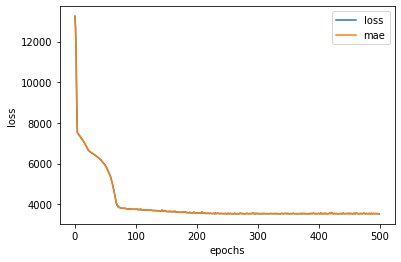

In [40]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data(normalization and standardization)

> In terms of scaling values, neural networks tend to perfer normalization.

> If I am not sure what to use, I can try both and see which performs better in this case.

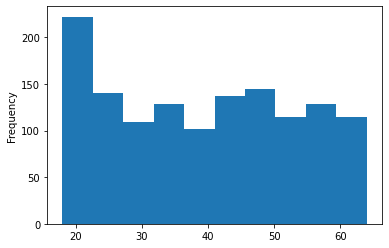

In [41]:
X["age"].plot(kind="hist")

In [42]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Preparing the data

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [46]:
# Turning all the values between 0 and 1
ct=make_column_transformer((MinMaxScaler(),['age', 'bmi','children']),
                           (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker', 'region'])
) 
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [47]:
X= insurance.drop("charges", axis=1)
y=insurance['charges']

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((936, 6), (402, 6), (936,), (402,))

In [51]:
ct.fit(X_train)

X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [53]:
X_train[:5]

,age,sex,bmi,children,smoker,region
332,61,female,31.160,0,no,northwest
355,46,male,27.600,0,no,southwest
138,54,female,31.900,3,no,southeast
381,55,male,30.685,0,yes,northeast
292,25,male,45.540,2,yes,southeast


In [52]:
X_train_normal[:5]

array([[0.93478261, 0.40893193, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.60869565, 0.31315577, 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.7826087 , 0.42884046, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.80434783, 0.39615281, 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.15217391, 0.79580307, 0.4       , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [54]:
X_train_normal.shape

(936, 11)

In [55]:
X_train.shape

(936, 6)

### Building the model

In [57]:
insurance_model_normal= tf.keras.Sequential([
     tf.keras.layers.Dense(100, name="input_layer"),
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(1, name="output_layer")
])

insurance_model_normal.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])

history =insurance_model_normal.fit(X_train_normal,y_train, epochs=500)

Epoch 1/500
30/30 [==============================] - 0s 2ms/step - loss: 13373.9316 - mae: 13373.9316
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 13346.4453 - mae: 13346.4453
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 13257.7959 - mae: 13257.7959
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 13047.1270 - mae: 13047.1270
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 12644.6035 - mae: 12644.6035
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 11983.1514 - mae: 11983.1514
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 11073.1523 - mae: 11073.1523
Epoch 8/500
30/30 [==============================] - 0s 2ms/step - loss: 10093.7607 - mae: 10093.7607
Epoch 9/500
30/30 [==============================] - 0s 2ms/step - loss: 9213.3438 - mae: 9213.3438
Epoch 10/500
30/30 [==============================] - 0s 2ms/step - loss: 8569.8652 

In [59]:
insurance_model_normal.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


### Evaluating the model

In [61]:
insurance_model_normal.evaluate(X_test_normal,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3139.8420 - mae: 3139.8420


[3139.842041015625, 3139.842041015625]